In [10]:
from mpl_toolkits.mplot3d.proj3d import proj_transform
from matplotlib.text import Annotation

class Annotation3D(Annotation):
    '''Annotate the point xyz with text s'''

    def __init__(self, s, xyz, *args, **kwargs):
        Annotation.__init__(self,s, xy=(0,0), *args, **kwargs)
        self._verts3d = xyz        

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.xy=(xs,ys)
        Annotation.draw(self, renderer)
        

In [11]:
def annotate3D(ax, s, *args, **kwargs):
    '''add anotation text s to to Axes3d ax'''

    tag = Annotation3D(s, *args, **kwargs)
    ax.add_artist(tag)

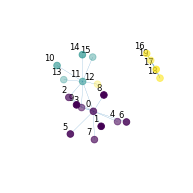

In [13]:
import matplotlib.pyplot as plt    
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits.mplot3d.art3d import Line3DCollection
%matplotlib inline

# data: coordinates of nodes and links
xn = [1.1, 1.9, 0.1, 0.3, 1.6, 0.8, 2.3, 1.2, 1.7, 1.0, -0.7, 0.1, 0.1, -0.9, 0.1, -0.1, 2.1, 2.7, 2.6, 2.0]
yn = [-1.2, -2.0, -1.2, -0.7, -0.4, -2.2, -1.0, -1.3, -1.5, -2.1, -0.7, -0.3, 0.7, -0.0, -0.3, 0.7, 0.7, 0.3, 0.8, 1.2]
zn = [-1.6, -1.5, -1.3, -2.0, -2.4, -2.1, -1.8, -2.8, -0.5, -0.8, -0.4, -1.1, -1.8, -1.5, 0.1, -0.6, 0.2, -0.1, -0.8, -0.4]
group = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 2, 2, 2, 3, 3, 3, 3]
edges = [(1, 0), (2, 0), (3, 0), (3, 2), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (11, 10), (11, 3), (11, 2), (11, 0), (12, 11), (13, 11), (14, 11), (15, 11), (17, 16), (18, 16), (18, 17), (19, 16), (19, 17), (19, 18)]
xyzn = list(zip(xn, yn, zn)) 
segments = [(xyzn[s], xyzn[t]) for s, t in edges]                

# create figure        
fig = plt.figure(dpi=60)
ax = fig.add_subplot(projection='3d')
ax.set_axis_off()

# plot vertices
ax.scatter(xn,yn,zn, marker='o', c = group, s = 64)    
# plot edges
edge_col = Line3DCollection(segments, lw=0.2)
ax.add_collection3d(edge_col)
# add vertices annotation.
for j, xyz_ in enumerate(xyzn): 
    annotate3D(ax, s=str(j), xyz=xyz_, fontsize=10, xytext=(-3,3),
               textcoords='offset points', ha='right',va='bottom')  